In [1]:
from math import log
def calcShannonEnt(dataSet): #计算信息熵
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
        shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries#计算类标签发生的概率
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

In [2]:
def createDataSet():#创建一个训练集
    dataSet=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [3]:
myDat,labels=createDataSet()#测试训练集的信息熵
calcShannonEnt(myDat)

0.9709505944546686

In [4]:
myDat[0][-1]='maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [5]:
def splitDataSet(dataSet,axis,value):#根据给定的参数划分数据集
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [6]:
def chooseBestFeatureToSplit(dataSet):#根据最大信息增益划分数据集
    numFeatures=len(dataSet[0])-1
    baseEntropy=calcShannonEnt(dataSet)
    #print(baseEntropy)
    bestInfoGain=0.0 
    bestFeature=-1
    for i in range(numFeatures):#计算信息熵
        featList=[example[i] for example in dataSet]
        #print(featList)
        uniqueVals=set(featList)
        #print(uniqueVals)
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            #print(subDataSet)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if(infoGain>bestInfoGain):#寻找最大增益
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [7]:
myDate,labels=createDataSet()
print(myDate)
chooseBestFeatureToSplit(myDate)#测试

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


0

In [8]:
import operator
def majorityCnt(classList):#绘制数图
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
            classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)#排序
    return sortedClassCount[0][0]

In [9]:
def createTree(dataSet,labels):#创建决策树
    #print(dataSet)
    classList=[example[-1] for example in dataSet]
    #print(classList)
    #print(classList.count(classList[0]))
    if classList.count(classList[0])==len(classList):#判断所有标签是否都相同
        return classList[0]#结束递归
    if len(dataSet[0])==1:#判断所有标签都使用完毕
        return majorityCnt(classList)#返回次数最多的标签
    bestFeat=chooseBestFeatureToSplit(dataSet)
    #print(bestFeat)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    #print(myTree)
    #print(labels)
    del(labels[bestFeat])
    #print(labels)
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        #print(subLabels)
        #print (myTree)
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)#递归
        #print(mytree)
    return myTree

In [10]:
myDat,labels=createDataSet()
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [11]:
import matplotlib.pyplot as plt

import matplotlib

#定义自定义字体，文件名是系统中文字体
myfont = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus']=False  





decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args=dict(arrowstyle='<-')


def plotNode(nodeTxt, centerPt, parentPt, nodeType):#绘制节点
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

def plotMidText(cntrPt,parentPt,txtString):#绘制每个
    xMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2.0+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):#绘制树
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalw,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalw
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
    

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False,**axprops) #ticks for demo puropses 
    plotTree.totalw=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.xOff=-0.5/plotTree.totalw
    plotTree.yOff=1.0
    plotTree(inTree,(0.5,1.0),'')
    #plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    #plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

In [13]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [14]:
def getNumLeafs(myTree):#获得叶子数
    numLeafs=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else:
            numLeafs+=1
    return numLeafs

def getTreeDepth(myTree):#获得树深
    maxDepth=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else:
            thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth
        
        
def retrieveTree(i):#测试树
    listOfTrees=[{
        'no surfacing':{
            0:'no',
            1:{
                'flippers':{0:'no',1:'yes'}
            }
        }
    },
                 {
        'no surfacing':{
            0:'no',
            1:{
                'flippers':{
                    0:{
                        'head':{0:'no',1:'yes'}
                    },
                    1:'no'
                }
            }
        }   
    }
    ]
    return listOfTrees[i]

In [15]:
print(retrieveTree(1))
myTree=retrieveTree(0)
myTree
print(getNumLeafs(myTree))
print(getTreeDepth(myTree))

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
3
2


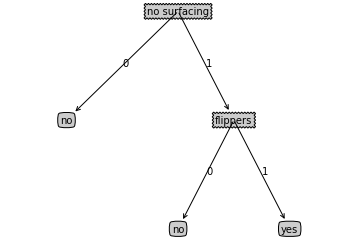

In [16]:
createPlot(myTree)#绘制决策树

In [17]:
def classify(inputTree,featLabels,testVec):#通过输入的决策数对testVec进行分类
    firstStr=list(inputTree.keys())[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classLabel=classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel

In [18]:
labels

['flippers']

In [19]:
myDat,labels=createDataSet()#创建数据集
labels

['no surfacing', 'flippers']

In [20]:
myTree=retrieveTree(0)#创建测试树
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [21]:
classify(myTree,labels,[1,0])#测试

'no'

In [22]:
classify(myTree,labels,[1,1])#测试

'yes'

In [23]:
#对决策树
def storeTree(inputTree,filename):
    import pickle
    fw=open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(filename):
    import pickle
    fr=open(filename)
    return pickle.load(fr)